# Import libraries

In [1]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# to select the features
from sklearn.feature_selection import SelectKBest, SelectPercentile
import pandas as pd
import csv
import seaborn as sns
sns.set_theme(style="whitegrid")
from tabulate import tabulate
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.io as pio
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score, mean_squared_error, mean_absolute_percentage_error
import numpy as np

In [2]:
from sklearn.tree import  DecisionTreeRegressor
from sklearn.metrics import  mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

# Import data

In [3]:
file_path = '../train_1.csv'

data = pd.read_csv(file_path)
data

,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,wtd_std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,53.622535,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00
1,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,53.979870,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00
2,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,53.656268,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00
3,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,53.639405,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00
4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,53.588771,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21188,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,43.202659,...,3.555556,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44
21189,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,50.148287,...,2.047619,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10
21190,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,5.405448,...,4.800000,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98
21191,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,6.249958,...,4.690000,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84


# Data preparation

In [4]:
X = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=20,
)

X_train.shape, X_test.shape

((16954, 80), (4239, 80))

# Univariate Feature Selection

In [6]:
sel = SelectBySingleFeaturePerformance(
    estimator=DecisionTreeRegressor(random_state=40),
    scoring='neg_mean_squared_error',
    cv=20,
    threshold=None,
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(cv=20,
                                 estimator=DecisionTreeRegressor(random_state=40),
                                 scoring='neg_mean_squared_error')

In [7]:
sel.features_to_drop_

['wtd_mean_atomic_mass',
 'wtd_gmean_atomic_mass',
 'wtd_entropy_atomic_mass',
 'wtd_range_atomic_mass',
 'wtd_std_atomic_mass',
 'wtd_mean_fie',
 'wtd_gmean_fie',
 'wtd_entropy_fie',
 'wtd_range_fie',
 'wtd_std_fie',
 'wtd_mean_atomic_radius',
 'wtd_gmean_atomic_radius',
 'wtd_entropy_atomic_radius',
 'wtd_range_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_mean_Density',
 'wtd_gmean_Density',
 'wtd_entropy_Density',
 'wtd_range_Density',
 'wtd_std_Density',
 'wtd_mean_ElectronAffinity',
 'wtd_gmean_ElectronAffinity',
 'wtd_entropy_ElectronAffinity',
 'wtd_range_ElectronAffinity',
 'wtd_std_ElectronAffinity',
 'wtd_mean_FusionHeat',
 'wtd_gmean_FusionHeat',
 'wtd_entropy_FusionHeat',
 'wtd_range_FusionHeat',
 'wtd_std_FusionHeat',
 'wtd_mean_ThermalConductivity',
 'wtd_gmean_ThermalConductivity',
 'wtd_entropy_ThermalConductivity',
 'wtd_entropy_Valence',
 'range_Valence',
 'wtd_range_Valence',
 'std_Valence',
 'wtd_std_Valence']

Text(0.5, 1.0, 'Univariate performance')

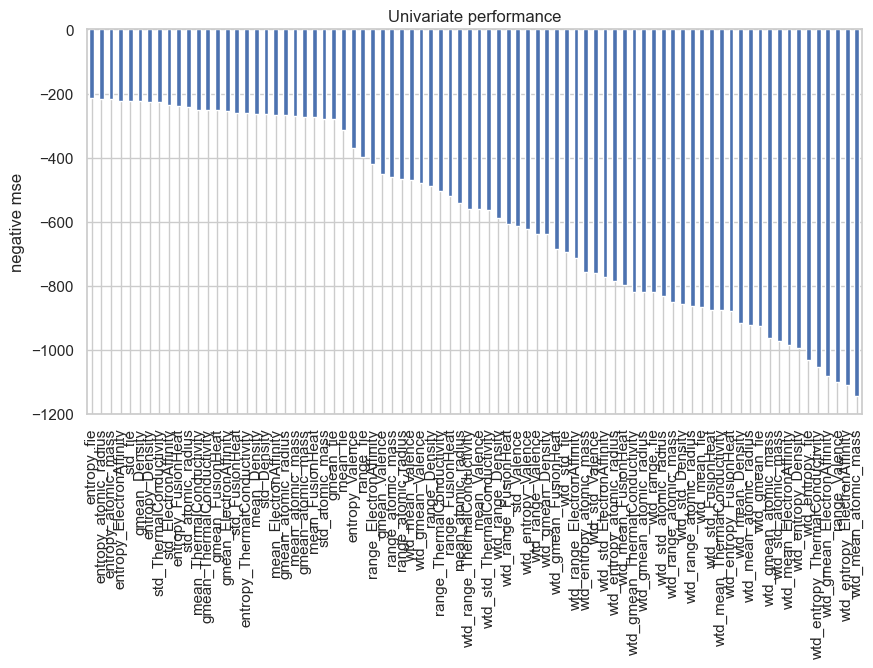

In [8]:
pd.Series(sel.feature_performance_
          ).sort_values(ascending=False
                        ).plot.bar(figsize=(10, 5))

plt.ylabel('negative mse')
plt.title('Univariate performance')

In [9]:
X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((16954, 42), (4239, 42))

# Scaling

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_sc= min_max_scaler.fit_transform(X_train_t)

X_test_sc=min_max_scaler.fit_transform(X_test_t)

In [11]:
scaler = MinMaxScaler()


y_train_sc = scaler.fit_transform(y_train.values.reshape(-1, 1))


y_test_sc = scaler.transform(y_test.values.reshape(-1, 1))

# Baseline model

In [12]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.dummy import DummyRegressor
from sklearn.metrics import (
    mean_absolute_error as mae,
    r2_score as r2,
    mean_absolute_percentage_error as mape,
    mean_squared_error as mse)

In [13]:
def report_metrics(model, X_train_sc, X_test_sc, y_train_sc, y_test_sc, label):
    print(f'Train MAE ({label}):', round(mae(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test MAE ({label}) :', round(mae(y_test_sc, model.predict(X_test_sc)), 4), '\n')

    print(f'Train R^2 ({label}):', round(r2(y_train_sc, model.predict(X_train_sc)), 4))
    print(f'Test R^2 ({label}) :', round(r2(y_test_sc, model.predict(X_test_sc)), 4), '\n')

In [14]:
LR_baseline = LinearRegression().fit(X_train_sc, y_train_sc)
report_metrics(LR_baseline, X_train_sc, X_test_sc, y_train_sc, y_test_sc, 'LR_baseline')

Train MAE (LR_baseline): 0.0816
Test MAE (LR_baseline) : 0.0935 

Train R^2 (LR_baseline): 0.6634
Test R^2 (LR_baseline) : 0.5736 



# Cross-Validation

In [15]:
list_of_models = [        
        RandomForestRegressor(),
        XGBRegressor(),
        KNeighborsRegressor(),
        LGBMRegressor(),
        SVR()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=30,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                        fit_time  score_time  neg_mean_squared_error
RandomForestRegressor  62.660181    0.037244               -0.002729
XGBRegressor            9.884517    0.004317               -0.003016
KNeighborsRegressor     0.007297    0.113291               -0.003747
LGBMRegressor           1.177761    0.007813               -0.003405
SVR                     8.099957    0.439630               -0.007073


In [16]:
list_of_models = [        
        CatBoostRegressor()]
        
    

list_of_model_names = [type(x).__name__ for x in list_of_models]
cv_results = pd.DataFrame(
        data=0.0,
        index=list_of_model_names,
        columns=['fit_time', 'score_time','neg_mean_squared_error'])
    
    

    # обучение всех моделей из списка
for model in list_of_models:
        
        cv_result = cross_validate(
            estimator=model,
            X=X_train_sc,
            y=y_train_sc,
            scoring=['neg_mean_squared_error'],
            cv=7,
            n_jobs=-1)
        

        cv_results.loc[type(model).__name__] = list(map(np.mean, cv_result.values()))

print(cv_results)

                    fit_time  score_time  neg_mean_squared_error
CatBoostRegressor  36.078375    0.058451               -0.003221


# RandomForestRegressor

In [15]:
model_1 = RandomForestRegressor(n_estimators=100, random_state=42)
model_1.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_1 = model_1.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_1)
mae = mean_absolute_error(y_test_sc, y_pred_1)
r2 = r2_score(y_test_sc, y_pred_1)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_1)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

C:\Users\Misi\AppData\Local\Temp\ipykernel_13576\1833622144.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(X_train_sc, y_train_sc)


Mean Squared Error (MSE): 0.005724719502225316
Mean Absolute Error (MAE): 0.05047974464424043
R-squared (R2): 0.8380822304577609
mape: 37.46659307978662


# XGBRegressor

In [13]:
model_2 = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_2.fit(X_train_sc, y_train_sc)

# Make predictions on the test set
y_pred_2 = model_2.predict(X_test_sc)

# Evaluate the model's performance
mse = mean_squared_error(y_test_sc, y_pred_2)
mae = mean_absolute_error(y_test_sc, y_pred_2)
r2 = r2_score(y_test_sc, y_pred_2)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.006134064916640939
Mean Absolute Error (MAE): 0.05346153209575924
R-squared (R2): 0.8265043188327883
mape: 31.203115029896928


In [14]:
scaler = MinMaxScaler()


scaler.fit(y_train.values.reshape(-1, 1))



y_pred_unsc = scaler.inverse_transform( y_pred_2.reshape(-1, 1))


y_test_unsc = scaler.inverse_transform(y_test_sc.reshape(-1, 1))

y_test_unsc = y_test_unsc.ravel()
y_pred_unsc = y_pred_unsc.ravel()

result_df = pd.DataFrame({'y_test_unsc': y_test_unsc, 'y_pred_unsc': y_pred_unsc})

print(result_df)

      y_test_unsc  y_pred_unsc
0           19.55    17.631039
1           55.00    50.323860
2            3.15     4.338784
3           86.00    66.205070
4           18.80    14.863583
...           ...          ...
4234        13.50    26.353012
4235         1.56     3.586429
4236         0.68     3.696271
4237        17.90    13.057321
4238         1.06     6.714712

[4239 rows x 2 columns]


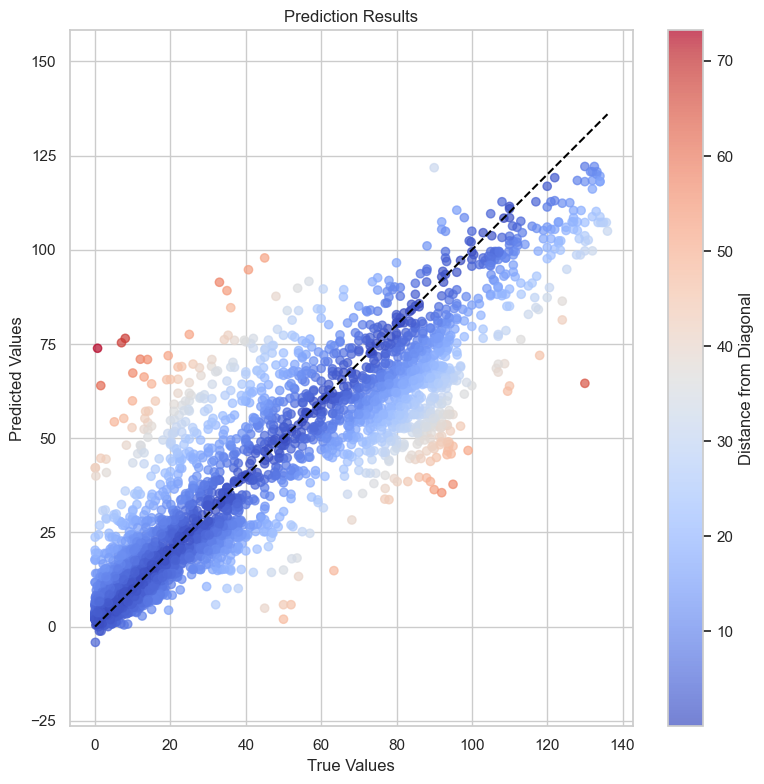

In [15]:
result_df['distance'] = np.abs(result_df['y_test_unsc'] - result_df['y_pred_unsc'])


plt.figure(figsize=(8, 8))
plt.scatter(result_df['y_test_unsc'], result_df['y_pred_unsc'], c=result_df['distance'], cmap='coolwarm', alpha=0.7)
plt.plot([min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         [min(result_df['y_test_unsc']), max(result_df['y_test_unsc'])], 
         color='black', linestyle='--')
plt.colorbar(label='Distance from Diagonal')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Prediction Results')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [21]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from skopt.space import Real, Integer, Categorical
from tqdm import tqdm

In [24]:
param_space = {
    'eta': hp.loguniform('eta', np.log(0.001), np.log(1.0)),
    'gamma': hp.loguniform('gamma', np.log(0.001), np.log(1.0)),
    'max_depth': hp.quniform('max_depth', 2, 15, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'max_delta_step': hp.loguniform('max_delta_step', np.log(0.001), np.log(10.0)),
    'lambda': hp.loguniform('lambda', np.log(0.001), np.log(10.0)),
    'alpha': hp.loguniform('alpha', np.log(0.001), np.log(10.0)),
    'tree_method': hp.choice('tree_method', ['hist', 'exact']),  # Only CPU-based tree methods
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(1.0)),
}

# Define the objective function to minimize (negative mean squared error)
def objective(params):
    params['max_depth'] = int(params['max_depth'])  # Convert max_depth to an integer
    model = XGBRegressor(random_state=42, **params)
    mse_scores = -cross_val_score(model, X_train_sc, y_train_sc, scoring='neg_mean_squared_error', cv=5)
    return {'loss': mse_scores.mean(), 'status': STATUS_OK}

# Initialize Trials to keep track of results
trials = Trials()

# Define the number of iterations for optimization
num_iterations = 100

# Run the hyperparameter optimization with a progress bar
best = []
for _ in tqdm(range(num_iterations), desc='Hyperparameter Tuning', unit='iter'):
    best = fmin(
        fn=objective,
        space=param_space,
        algo=tpe.suggest,
        max_evals=len(trials.trials) + 1,  # Incremental evaluations
        trials=trials,
        verbose=0
    )

# Get the best hyperparameters and corresponding MSE score
best_params = {param: value for param, value in best.items()}
best_mse = min([trial['result']['loss'] for trial in trials.trials])

print("Best hyperparameters:", best_params)
print("Best MSE score:", best_mse)

Hyperparameter Tuning: 100%|██████████| 100/100 [07:06<00:00,  4.27s/iter]

Best hyperparameters: {'alpha': 0.02134891368436722, 'eta': 0.02025712525996917, 'gamma': 0.004979372114651379, 'lambda': 0.11420422611391455, 'learning_rate': 0.058745716329104844, 'max_delta_step': 0.21845108541855393, 'max_depth': 12.0, 'min_child_weight': 1.0, 'tree_method': 1}
Best MSE score: 0.002926598703734049


In [25]:
model_2_tun = XGBRegressor(random_state=42, alpha=0.02134891368436722, 
                            eta=0.02025712525996917, gamma=0.004979372114651379, reg_lambda= 0.11420422611391455, 
                            learning_rate=0.058745716329104844, 
                            max_delta_step=0.21845108541855393, max_depth=12,
                             min_child_weight=1, tree_method='exact')
model_2_tun.fit(X_train_sc, y_train_sc)
y_pred_2_tun= model_2_tun.predict(X_test_sc)

# Evaluate the model's performanc
mse = mean_squared_error(y_test_sc, y_pred_2_tun)
mae = mean_absolute_error(y_test_sc, y_pred_2_tun)
r2 = r2_score(y_test_sc, y_pred_2_tun)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_2_tun)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

Mean Squared Error (MSE): 0.005748247091998702
Mean Absolute Error (MAE): 0.05057679355077826
R-squared (R2): 0.837416776917665
mape: 33.539305599093645


# CatBoostRegressor

In [17]:
model_3 = CatBoostRegressor(iterations=200, learning_rate=0.1, depth=6, random_seed=42)


model_3.fit(X_train_sc, y_train_sc, verbose=50)


y_pred_3 = model_3.predict(X_test_sc)

mse = mean_squared_error(y_test_sc, y_pred_3)
mae = mean_absolute_error(y_test_sc, y_pred_3)
r2 = r2_score(y_test_sc, y_pred_3)
mape = mean_absolute_percentage_error(y_test_sc, y_pred_3)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)
print("mape:", mape)

0:	learn: 0.1711488	total: 147ms	remaining: 29.3s
50:	learn: 0.0712747	total: 316ms	remaining: 922ms
100:	learn: 0.0649784	total: 479ms	remaining: 469ms
150:	learn: 0.0610664	total: 640ms	remaining: 208ms
199:	learn: 0.0581005	total: 801ms	remaining: 0us
Mean Squared Error (MSE): 0.005808414400270597
Mean Absolute Error (MAE): 0.052254699649873455
R-squared (R2): 0.8357150068395051
mape: 32.99065328824459


In [16]:
data = {
    'Model': ['RandomForestRegressor', 'XGBRegressor', 'XGBRegressor (Hyperopt)', 'CatBoostRegressor'],
    'Mean Squared Error (MSE)': [0.005724719502225316, 0.006134064916640939, 0.005748247091998702, 0.005808414400270597],
    'Mean Absolute Error (MAE)': [0.05047974464424043, 0.05346153209575924, 0.05057679355077826, 0.052254699649873455],
    'R-squared (R2)': [0.8380822304577609, 0.8265043188327883, 0.837416776917665, 0.8357150068395051],
    'MAPE': [37.46659307978662, 31.203115029896928, 33.539305599093645, 32.99065328824459]
}

# Округление значений до 4 знаков после запятой
for key in data.keys():
    if key != 'Model':
        data[key] = [round(value, 4) for value in data[key]]

df = pd.DataFrame(data)
df

,Model,Mean Squared Error (MSE),Mean Absolute Error (MAE),R-squared (R2),MAPE
0,RandomForestRegressor,0.0057,0.0505,0.8381,37.4666
1,XGBRegressor,0.0061,0.0535,0.8265,31.2031
2,XGBRegressor (Hyperopt),0.0057,0.0506,0.8374,33.5393
3,CatBoostRegressor,0.0058,0.0523,0.8357,32.9907


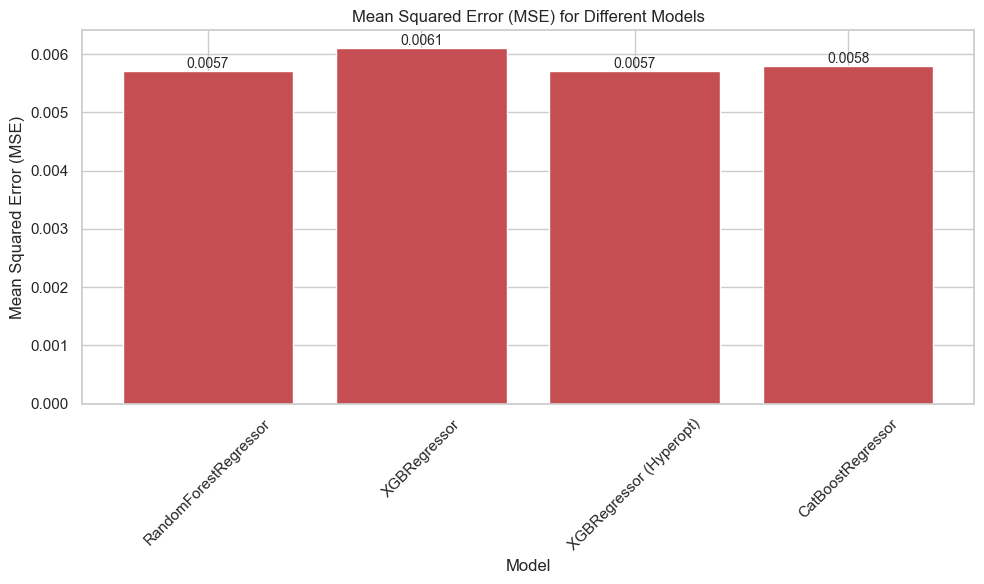

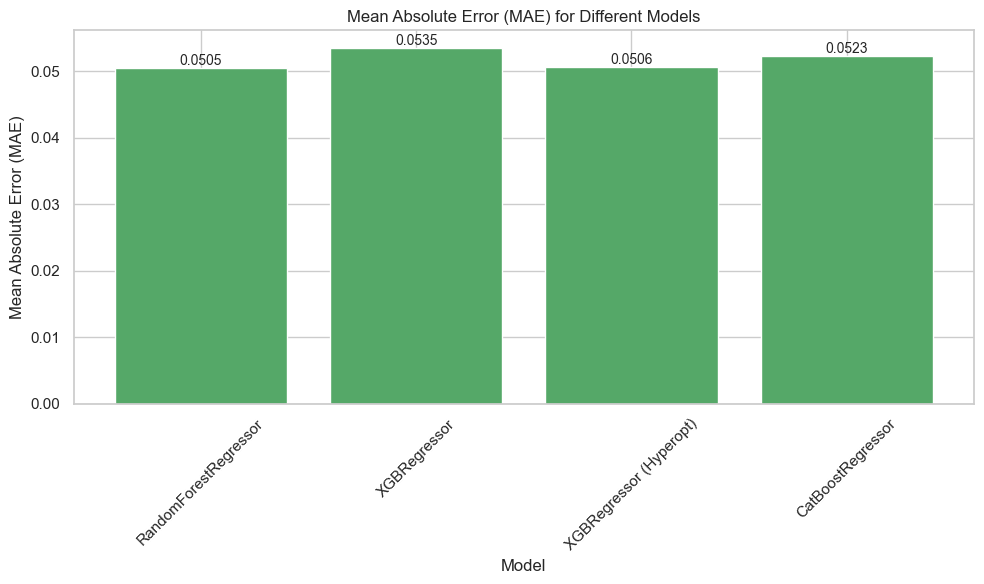

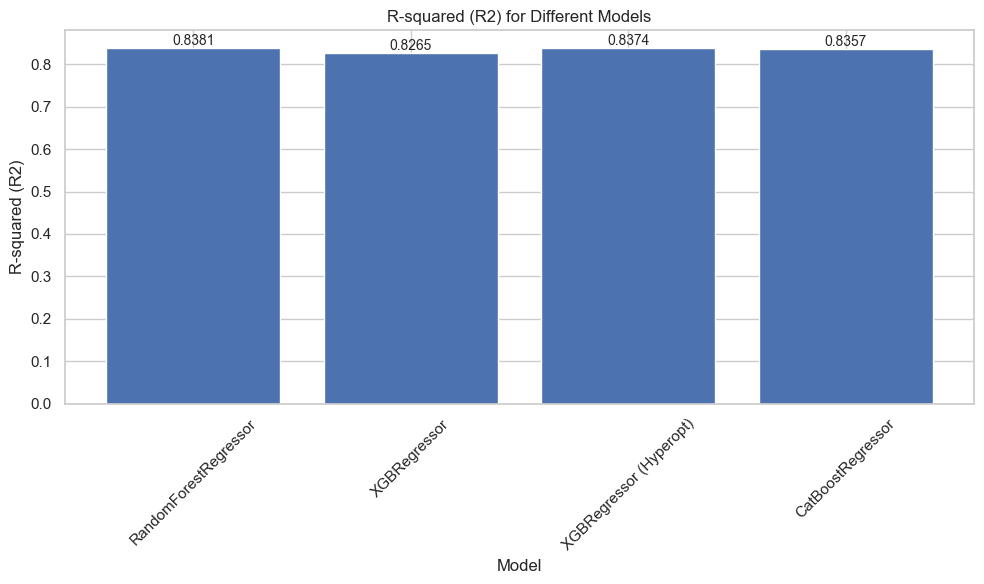

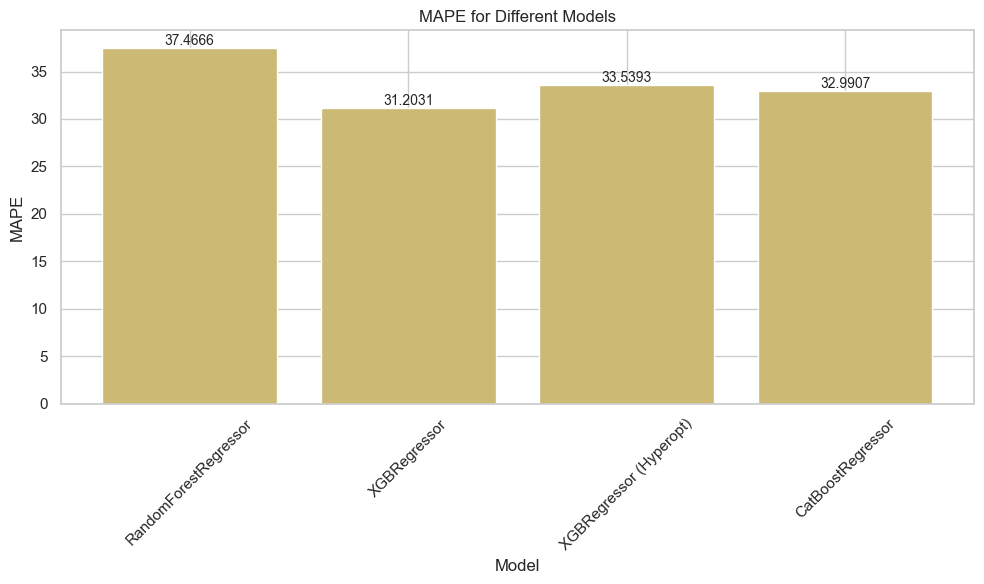

In [18]:
metrics = ['Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'R-squared (R2)', 'MAPE']
colors = ['r', 'g', 'b', 'y']

for metric, color in zip(metrics, colors):
    plt.figure(figsize=(10, 6))
    plt.bar(df['Model'], df[metric], color=color)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} for Different Models')
    plt.xticks(rotation=45)
    
    for i, value in enumerate(df[metric]):
        plt.text(i, value, str(value), ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.show()